In [66]:
import seaborn as sns
df=sns.load_dataset('tips') #preloaded dataset of seaborn
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [69]:
df.dtypes  #category is same as object

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [70]:
#Correlation
correlation=df.corr(numeric_only=True)
correlation #result is correlation matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

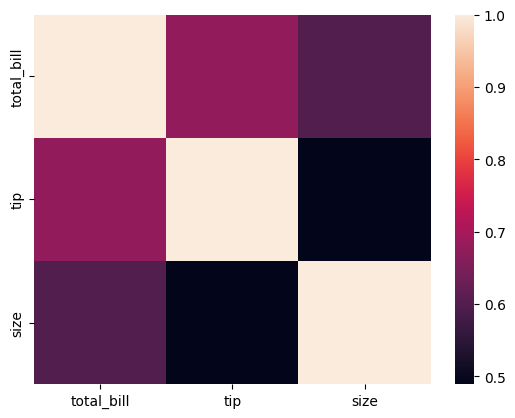

In [71]:
#Heatmap 
#helps to represent correlation visually

sns.heatmap(correlation)

#lighter colors => strong correlation
#darker colors => weak correlation

<Axes: >

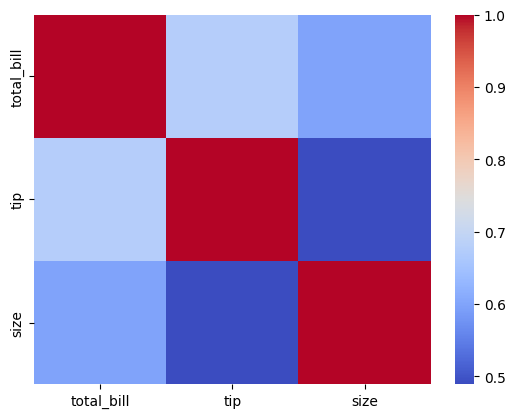

In [72]:
sns.heatmap(correlation,cmap='coolwarm') #red => strong, blue => weak

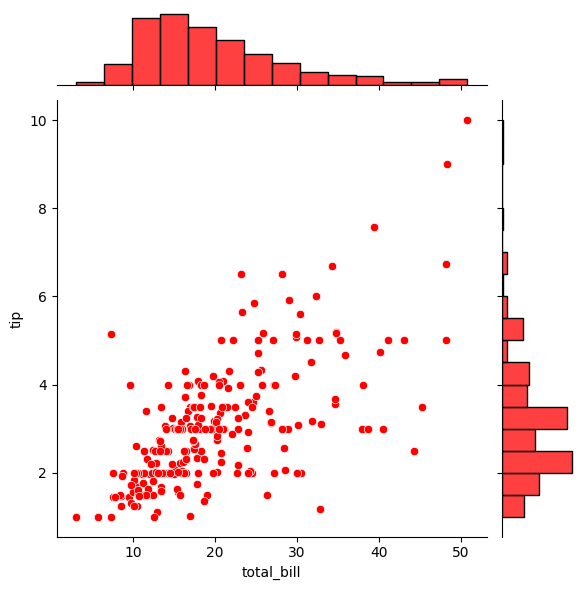

In [73]:
#Jointplot
# Scatter Plot: Default representation to show relationships.
# Histograms/Density Plots: Marginal distributions on the axes.

sns.jointplot(x='total_bill',y='tip',data=df,color='red')

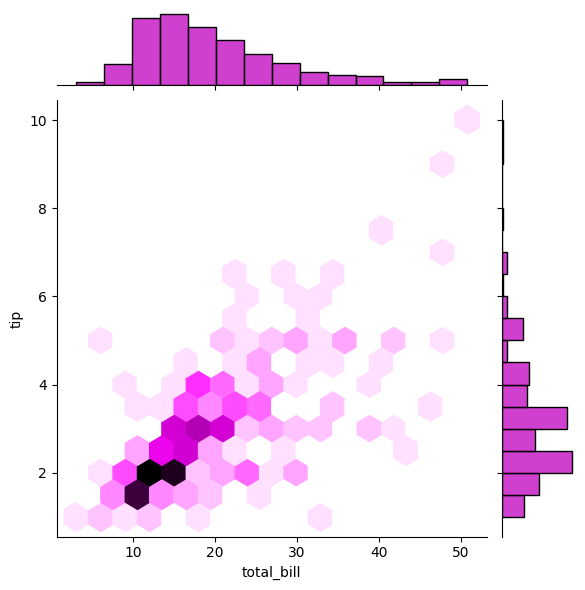

In [74]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex',color='m')
#kind=reg => Regression line with scatter

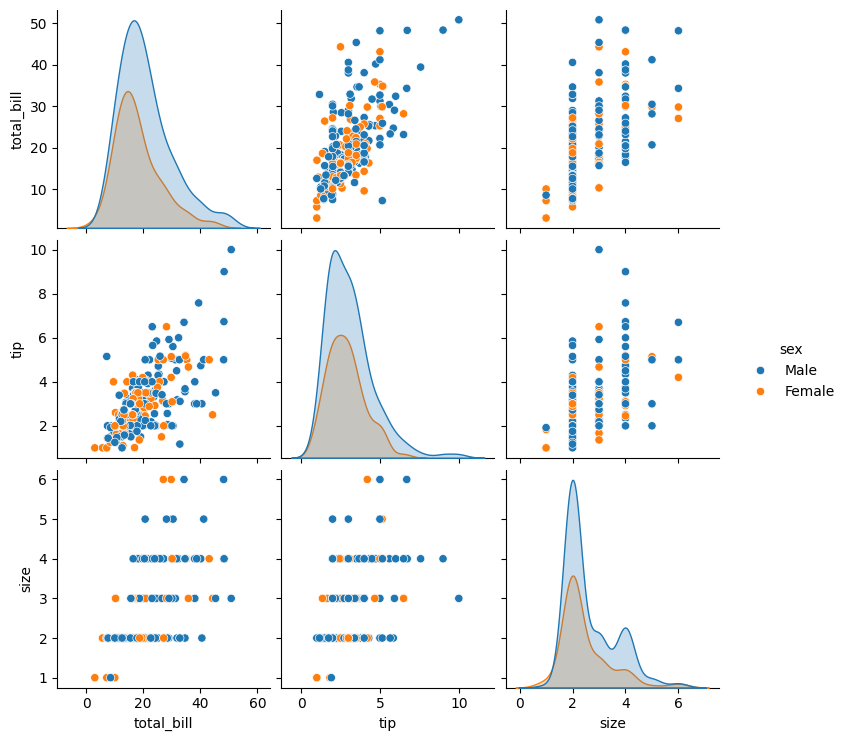

In [75]:
#Pairplot => visual rep of correlation matrix, diagonal elements will be histagrams

sns.pairplot(df,hue='sex')

<Axes: xlabel='sex', ylabel='count'>

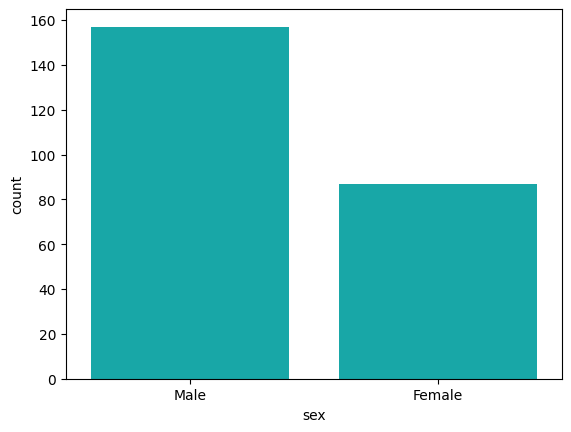

In [76]:
#Countplot => only for categorical columns

sns.countplot(x='sex',data=df,color='c')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14596\3599529321.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:c'` for the same effect.

  sns.countplot(x='day',data=df,color='c',hue='sex')


<Axes: xlabel='day', ylabel='count'>

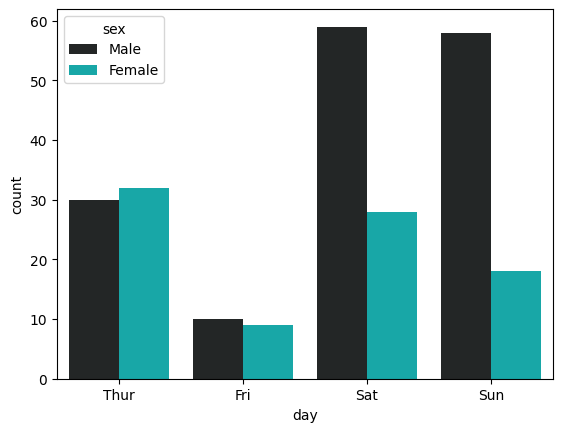

In [77]:
sns.countplot(x='day',data=df,color='c',hue='sex')

<Axes: xlabel='total_bill', ylabel='day'>

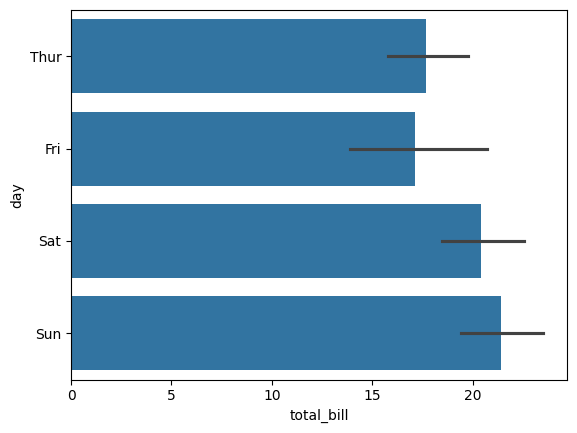

In [78]:
#Barplot => numerical & categorical

sns.barplot(x='total_bill',y='day',data=df)
#black line is to know whether data is consistent or not, longer line => inconsistent

<Axes: xlabel='smoker', ylabel='total_bill'>

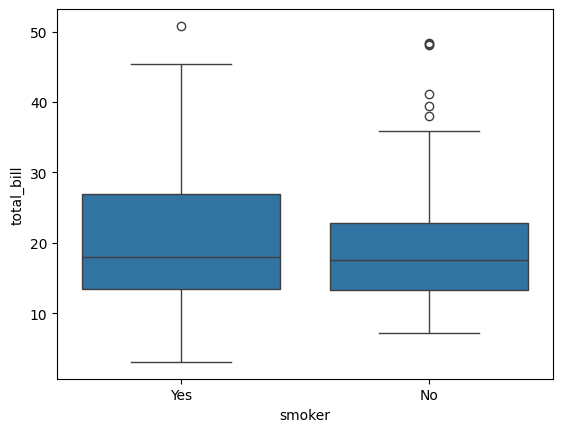

In [79]:
#BoxPlot
# used to find outlier
# Box: Represents the interquartile range (IQR, 25th to 75th percentile). #arrange unique values in asc order first, then 50% numbers
# Line Inside Box: Median of the data.
# Whiskers: Extend to 1.5 times the IQR or the min/max values. (range of data)
# Dots (Fliers): Outliers beyond whiskers

sns.boxplot(x='smoker',y='total_bill',data=df)

<Axes: ylabel='total_bill'>

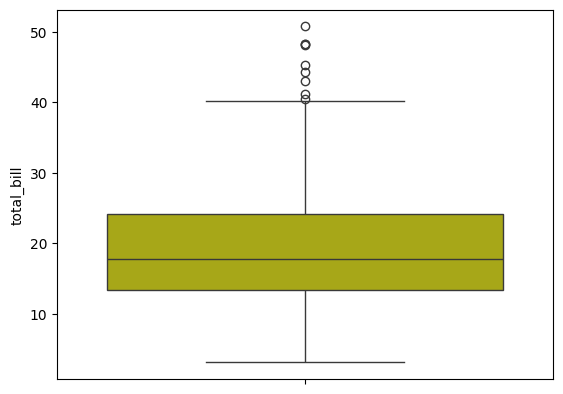

In [80]:
sns.boxplot(y='total_bill',data=df,color='y')

<Axes: xlabel='size', ylabel='total_bill'>

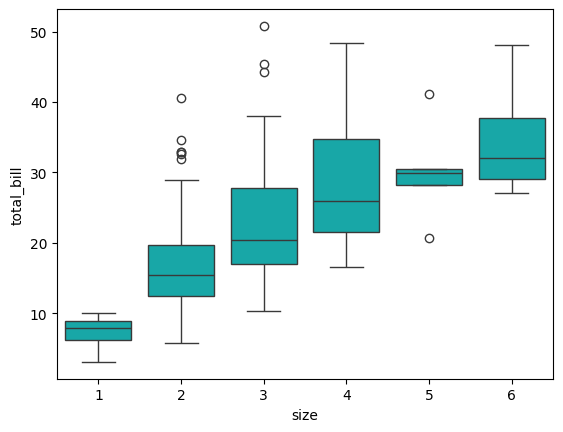

In [81]:
sns.boxplot(x='size',y='total_bill',data=df,color='c')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14596\2735012448.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:m'` for the same effect.

  sns.boxplot(x='time',y='total_bill',data=df,color='m',hue='sex')


<Axes: xlabel='time', ylabel='total_bill'>

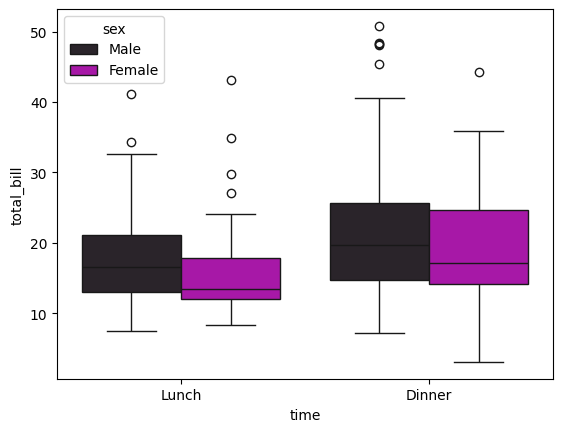

In [82]:
sns.boxplot(x='time',y='total_bill',data=df,color='m',hue='sex')

In [83]:
#___Outliers Removal___

In [84]:
#function to remove outliers using threshold found from boxplot

import matplotlib.pyplot as plt

def removal_boxplot(df, col, threshold):
    sns.boxplot(df[col])
    plt.title(f"Original boxplot of {col}")
    plt.show()

    removed_outliers=df[df[col] <= threshold]

    sns.boxplot(removed_outliers[col])
    plt.title(f'Boxplot without Outliers of {col}')
    plt.show()
    return removed_outliers

<Axes: ylabel='total_bill'>

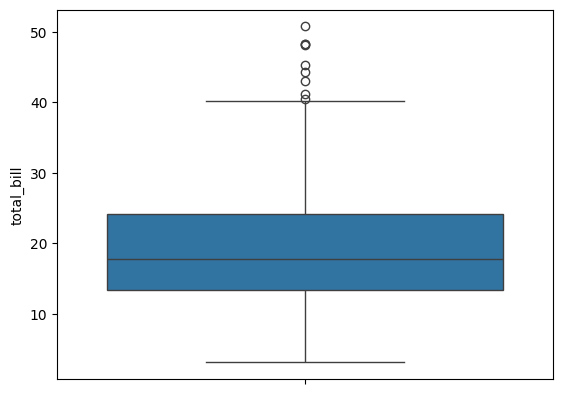

In [85]:
sns.boxplot(df['total_bill'])

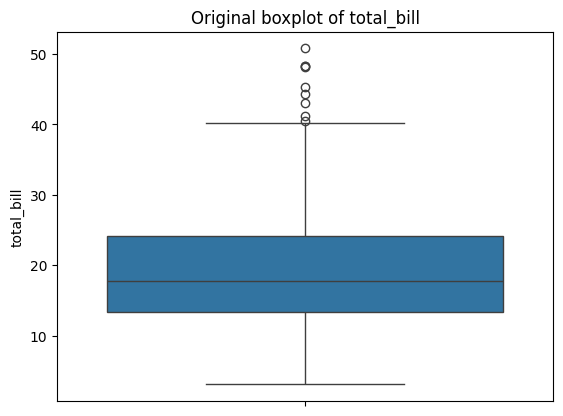

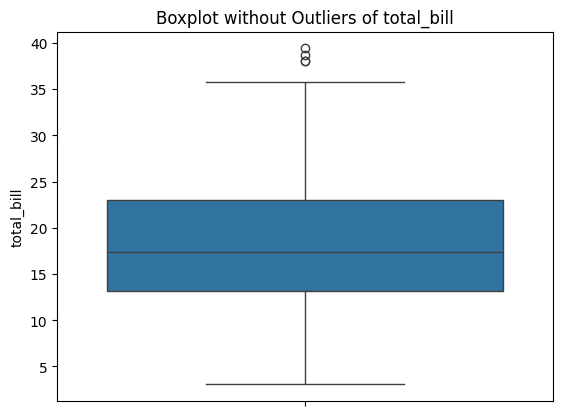

In [86]:
thresh_val=40
no_out=removal_boxplot(df,'total_bill',thresh_val)

In [87]:
#finding outlier range without using boxplot

import numpy as np
Q1=np.percentile(df['total_bill'], 25, method='midpoint')
Q3=np.percentile(df['total_bill'], 75, method='midpoint')
IQR=Q3-Q1
print(IQR)

10.849999999999998


In [88]:
#Finding upper bound
upper=Q3+1.5*IQR
upper_arr=np.array(df['total_bill']>=upper)
print("Upper Bound: ",upper)
print(upper_arr.sum())

#Finding lower bound
lower=Q1-1.5*IQR
lower_arr=np.array(df['total_bill']<=lower)
print("Lower Bound: ",lower)
print(lower_arr.sum())

Upper Bound:  40.449999999999996
9
Lower Bound:  -2.9499999999999993
0
